### To predict the species of an iris flower based on it's sepal length, width and petal length, width

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('iris.csv')

In [5]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Independent features - sepal_length, sepal_width, petal_length, petal_width
#### Target feature - species

In [8]:
data.shape

(150, 5)

In [10]:
#Find missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Observation: There are no missing values in the dataset

In [13]:
#Find any duplicates
data.duplicated().sum()

3

In [15]:
#Drop the duplicates
data = data.drop_duplicates()

In [17]:
data.shape

(147, 5)

<Axes: >

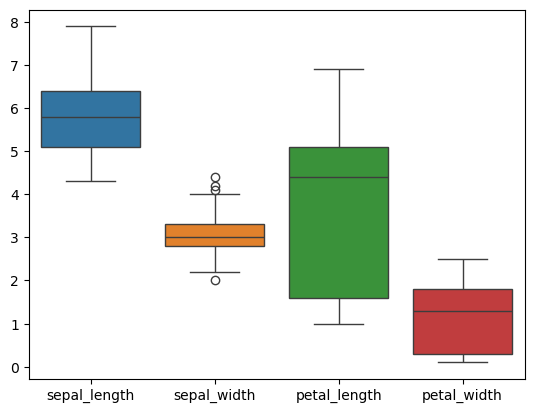

In [19]:
#Find any outliers
sb.boxplot(data=data)

In [21]:
#Replace outliers with median
q1 = data['sepal_width'].quantile(0.25)
q3 = data['sepal_width'].quantile(0.75)
iqr = q3 - q1
lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr
median = data['sepal_width'].median() #q2
data['sepal_width'] = data['sepal_width'].mask((data['sepal_width'] < lower_whisker) | (data['sepal_width'] > upper_whisker), median)        

<Axes: >

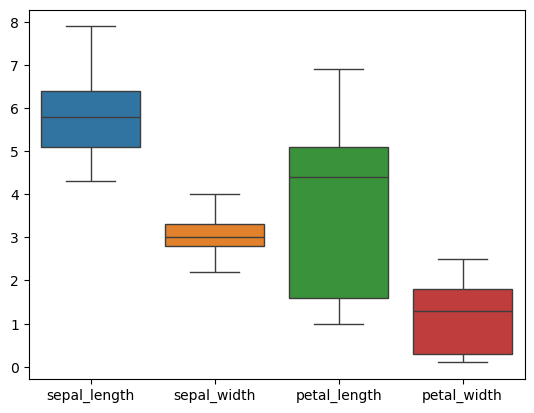

In [23]:
sb.boxplot(data=data)

### There are no outliers in this dataset

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [31]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


<Axes: >

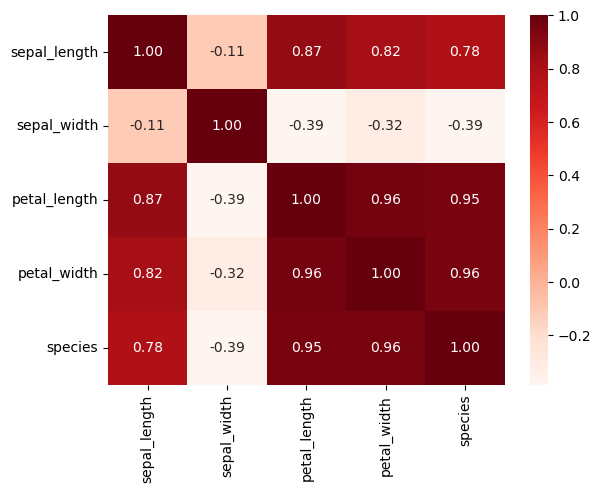

In [33]:
#Correlation matrix
corr = data.corr()
sb.heatmap(corr, annot=True, cmap='Reds', fmt='.2f')

### Observation:
Petal width has a very strong correlation with species. <br>
Petal length has a very strong correlation with species. <br>
Sepal length has a moderate correlation with species. <br>
Sepal width has a weak correlation with species. <br>

In [36]:
#Dropping the Sepal width since it has a weak correlation with species
X = data.drop(['sepal_width', 'species'], axis=1)
Y = data['species']

In [38]:
X.head(10)

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
5,5.4,1.7,0.4
6,4.6,1.4,0.3
7,5.0,1.5,0.2
8,4.4,1.4,0.2
9,4.9,1.5,0.1


### Splitting the data with 80/20

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [49]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [51]:
X_train

,sepal_length,petal_length,petal_width
0,0.594869,0.942503,0.767269
1,-1.606878,-1.389208,-1.366947
2,-0.383685,0.601277,1.034046
3,-0.872962,-1.332337,-1.366947
4,-1.117601,-1.389208,-1.366947
...,...,...,...
112,0.227911,0.487535,-0.033062
113,0.961827,1.113116,0.767269
114,-0.139047,-1.502950,-1.366947
115,-0.383685,0.203180,0.100326


### Logistic Regression

In [55]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [57]:
lr = OneVsRestClassifier(LogisticRegression())
lr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [59]:
Y_lr_pred = lr.predict(X_test)
Y_lr_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [61]:
lr_results_diff = pd.DataFrame({'Actual': Y_test, 'Predicted':Y_lr_pred})
lr_results_diff

,Actual,Predicted
127,2,2
53,1,1
140,2,2
19,0,0
106,2,1
12,0,0
78,1,1
31,0,0
83,1,1
9,0,0


In [63]:
print(f"Accuracy for Logistic Regression model: {accuracy_score(Y_test, Y_lr_pred)}")

Accuracy for Logistic Regression model: 0.9666666666666667


In [65]:
#Get the label names from iris datasets
from sklearn.datasets import load_iris

In [67]:
iris = load_iris()
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Observation: Based on the dataset target names and the order in which they occur: <br>
0 -> Setosa <br>
1 -> Versicolor <br>
2 -> Virginica <br>

In [69]:
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(Y_test, Y_lr_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### AUC-ROC curve:

In [129]:
from sklearn.metrics import auc, roc_curve

In [131]:
Y_lr_probs = lr.predict_proba(X_test)
Y_lr_probs

array([[2.58214766e-03, 3.78186761e-01, 6.19231091e-01],
       [8.79915379e-02, 7.86543097e-01, 1.25465365e-01],
       [1.08934221e-04, 2.13090997e-01, 7.86800069e-01],
       [8.14201676e-01, 1.85748788e-01, 4.95362781e-05],
       [1.86866998e-02, 5.68824506e-01, 4.12488794e-01],
       [7.74903749e-01, 2.25077349e-01, 1.89026601e-05],
       [1.53611999e-02, 6.17653604e-01, 3.66985196e-01],
       [8.46277023e-01, 1.53644450e-01, 7.85264861e-05],
       [3.54424155e-03, 5.01670132e-01, 4.94785627e-01],
       [7.69003461e-01, 2.30974640e-01, 2.18991882e-05],
       [8.08883924e-01, 1.91034861e-01, 8.12153637e-05],
       [4.84474195e-01, 5.01864320e-01, 1.36614851e-02],
       [1.36909456e-03, 3.15851597e-01, 6.82779309e-01],
       [1.39551950e-01, 8.06600216e-01, 5.38478335e-02],
       [1.51257024e-04, 2.44105612e-01, 7.55743131e-01],
       [1.33701583e-02, 5.97063194e-01, 3.89566648e-01],
       [8.25014849e-01, 1.74910185e-01, 7.49660586e-05],
       [6.41028463e-02, 7.70736

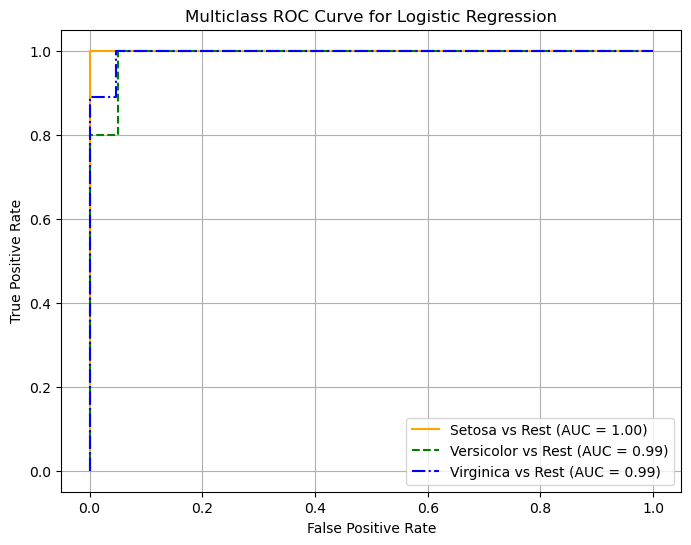

In [133]:
#Store the fpr, tpr and thresholds for each class
fpr = []
tpr = []
thresh = []
auc_scores = [] 

n_classes = 3

for i in range(n_classes):    
    fpr_i, tpr_i, thresh_i = roc_curve(Y_test, Y_lr_probs[:, i], pos_label=i)
    auc_i = auc(fpr_i, tpr_i)  
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    thresh.append(thresh_i)
    auc_scores.append(auc_i)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='solid', color='orange', label=f'Setosa vs Rest (AUC = {auc_scores[0]:.2f})')
plt.plot(fpr[1], tpr[1], linestyle='dashed', color='green', label=f'Versicolor vs Rest (AUC = {auc_scores[1]:.2f})')
plt.plot(fpr[2], tpr[2], linestyle='dashdot', color='blue', label=f'Virginica vs Rest (AUC = {auc_scores[2]:.2f})')

# Plot settings
plt.title('Multiclass ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [73]:
error_rates = []
k_values = range(1, 31)
for k in k_values:
    knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k))
    knn.fit(X_train, Y_train)
    Y_knn_pred = knn.predict(X_test)
    error = 1 - accuracy_score(Y_test, Y_knn_pred)
    error_rates.append(error)

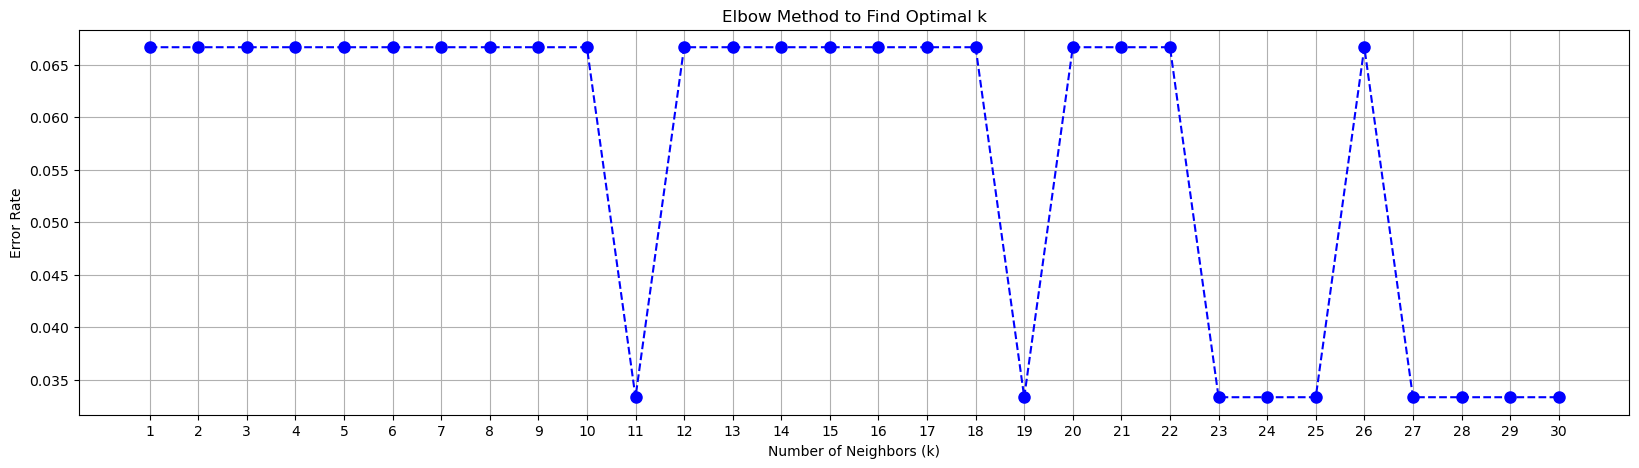

In [75]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 31))
plt.grid(True)
plt.show()

### Observation: The error rate is the least for k=11, 19, 23, 24, 25, 27, 28, 29, 30

In [77]:
for k in [11, 19, 23, 24, 25, 27, 28, 29, 30]:
    knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k))
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    print(f"Accuracy score when k = {k} : {accuracy_score(Y_test, Y_pred)}")

Accuracy score when k = 11 : 0.9666666666666667
Accuracy score when k = 19 : 0.9666666666666667
Accuracy score when k = 23 : 0.9666666666666667
Accuracy score when k = 24 : 0.9666666666666667
Accuracy score when k = 25 : 0.9666666666666667
Accuracy score when k = 27 : 0.9666666666666667
Accuracy score when k = 28 : 0.9666666666666667
Accuracy score when k = 29 : 0.9666666666666667
Accuracy score when k = 30 : 0.9666666666666667


### Observation: Since choosing odd number of k gives significant results and avoids the situation of ties, we choose all the odd values of k and perform cross validation

### Cross validation

In [79]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [81]:
for k in [11, 19, 23, 25, 27, 29]:
    score = cross_val_score(OneVsRestClassifier(KNeighborsClassifier(n_neighbors=k)), X_train, Y_train, cv=5)
    avg_score = mean(score)

    print(f"Cross validation score when k = {k} : {avg_score}")

Cross validation score when k = 11 : 0.9746376811594203
Cross validation score when k = 19 : 0.9489130434782609
Cross validation score when k = 23 : 0.9572463768115942
Cross validation score when k = 25 : 0.9572463768115942
Cross validation score when k = 27 : 0.9485507246376812
Cross validation score when k = 29 : 0.9568840579710145


### Observation: Since k=11 gives us the highest cross validation score, it is the optimal value to perform KNN

In [83]:
#Performing KNN with optimal value of k
knn_11 = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11))
knn_11.fit(X_train, Y_train)
Y_knn_pred = knn_11.predict(X_test)
print(f"Accuracy score for KNN: {accuracy_score(Y_test, Y_knn_pred)}")

Accuracy score for KNN: 0.9666666666666667


In [85]:
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(Y_test, Y_knn_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [136]:
Y_knn_probs = knn_11.predict_proba(X_test)
Y_knn_probs

array([[0.        , 0.36363636, 0.63636364],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.81818182, 0.18181818],
       [1.        , 0.        , 0.        ],
       [0.        , 0.81818182, 0.18181818],
       [1.        , 0.        , 0.        ],
       [0.        , 0.54545455, 0.45454545],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.09090909, 0.90909091],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.81818182, 0.18181818],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.36363636, 0.63636364],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

### AUC-ROC curve

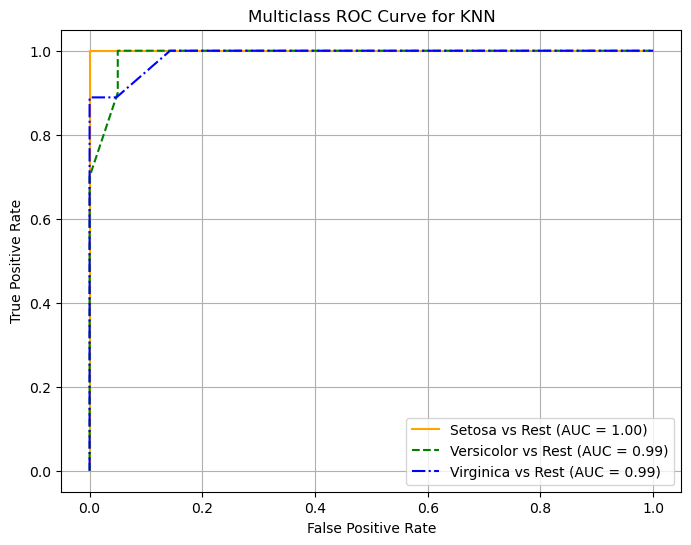

In [138]:
#Store the fpr, tpr and thresholds for each class
fpr = []
tpr = []
thresh = []
auc_scores = [] 

n_classes = 3

for i in range(n_classes):    
    fpr_i, tpr_i, thresh_i = roc_curve(Y_test, Y_knn_probs[:, i], pos_label=i)
    auc_i = auc(fpr_i, tpr_i)  
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    thresh.append(thresh_i)
    auc_scores.append(auc_i)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='solid', color='orange', label=f'Setosa vs Rest (AUC = {auc_scores[0]:.2f})')
plt.plot(fpr[1], tpr[1], linestyle='dashed', color='green', label=f'Versicolor vs Rest (AUC = {auc_scores[1]:.2f})')
plt.plot(fpr[2], tpr[2], linestyle='dashdot', color='blue', label=f'Virginica vs Rest (AUC = {auc_scores[2]:.2f})')

# Plot settings
plt.title('Multiclass ROC Curve for KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

### Observation: Since there is no skew in the class distribution, criterion='gini' gives better results than 'entropy'

In [89]:
dt_clr = OneVsRestClassifier(DecisionTreeClassifier())
dt_clr.fit(X_train, Y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [91]:
Y_dt_pred = dt_clr.predict(X_test)

In [93]:
print(f"Accuracy for Decision Tree Classifier: {accuracy_score(Y_test, Y_dt_pred)}")

Accuracy for Decision Tree Classifier: 0.9333333333333333


In [95]:
#Find the best value for max_depth in decision tree
scores = []
depths = range(1, 21)
for d in depths:
    score = cross_val_score(OneVsRestClassifier(DecisionTreeClassifier(max_depth=d)), X_train, Y_train, cv=5)
    avg_score = mean(score)
    scores.append(avg_score)

In [97]:
best_depth = depths[np.argmax(scores)]
print(f"Best max_depth: {best_depth}")

Best max_depth: 4


In [99]:
dt_clr_opt = OneVsRestClassifier(DecisionTreeClassifier(max_depth=4))
dt_clr_opt.fit(X_train, Y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=4))

In [101]:
Y_dt_opt_pred = dt_clr_opt.predict(X_test)

In [103]:
print(f"Accuracy score for the optimized decision tree classifier: {accuracy_score(Y_test, Y_dt_opt_pred)}")

Accuracy score for the optimized decision tree classifier: 0.9333333333333333


In [105]:
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(Y_test, Y_dt_opt_pred, target_names=target_names))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Plot the decision tree

In [147]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

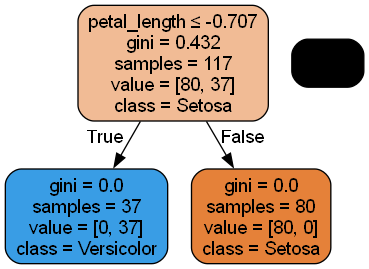

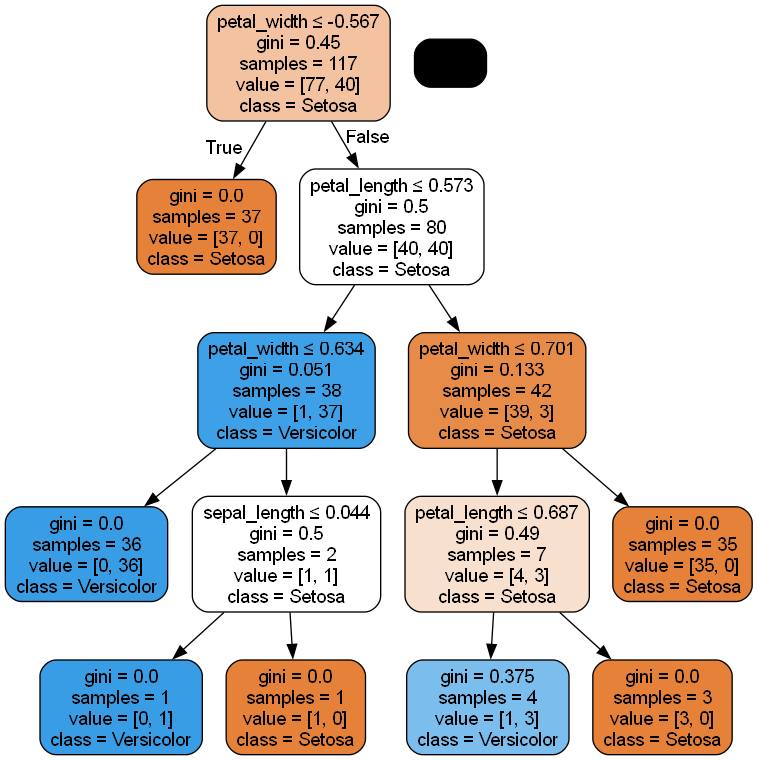

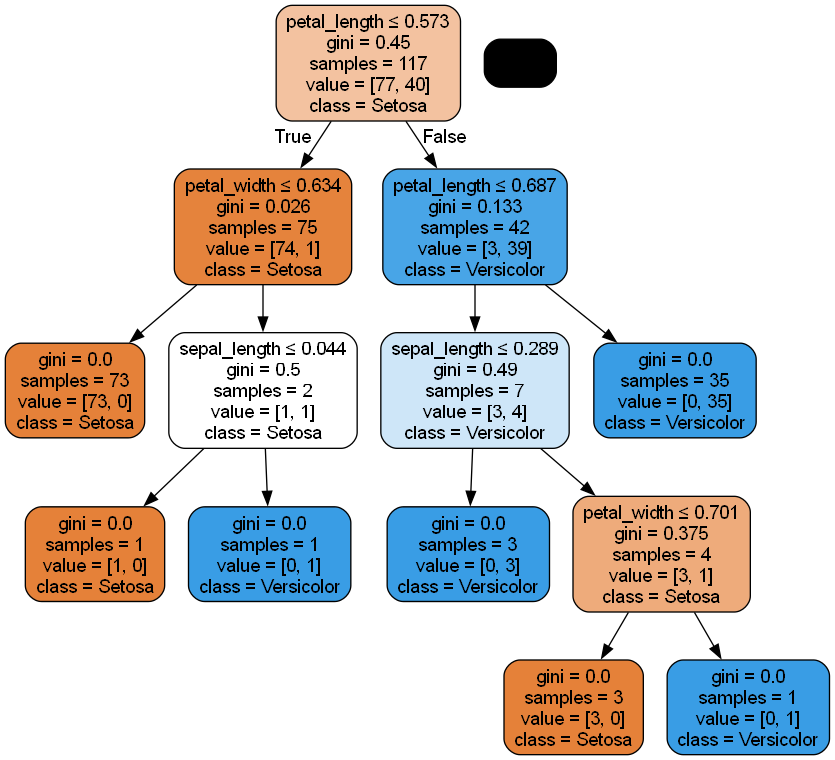

In [153]:
#Estimator is a single chunk of decision tree
for i, estimator in enumerate(dt_clr_opt.estimators_):
    #DOT format is used to visualize graphs
    dot_data = StringIO()
    
    # Export graph for the underlying decision tree
    export_graphviz(
        estimator, 
        out_file=dot_data, #Directs the graph data to the dot_data object instead of saving directly to a file.
        filled=True,  #Fills the nodes with colors based on class distribution 
        rounded=True, #Rounds the corners of the nodes for a cleaner look.
        special_characters=True, #Allows the use of special characters like ≤ in the tree for clarity.
        feature_names=X.columns, 
        class_names=['Setosa', 'Versicolor', 'Virginica']
    )
    
    # Generate and display the graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  #Retrieves the DOT data as a string from the in-memory object.
    graph.write_png(f'Iris_Class_{i}.png')  #Converts the DOT-format string into a graph object that can be rendered as an image.
    display(Image(filename=f'Iris_Class_{i}.png'))

### AUC-ROC curve

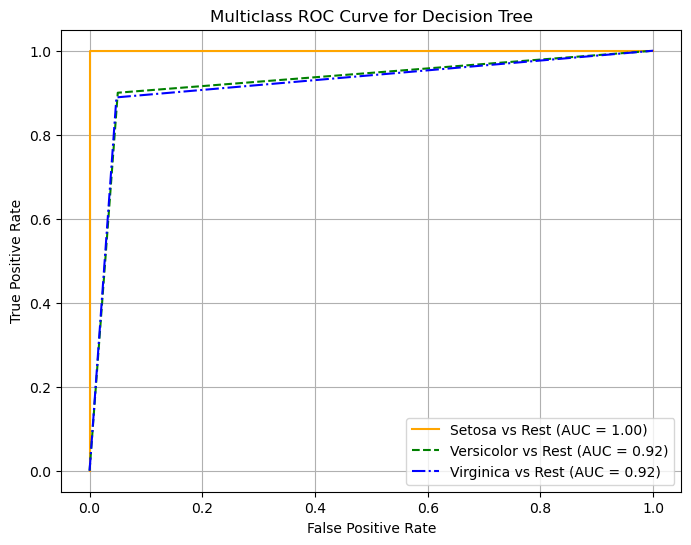

In [140]:
Y_dt_probs = dt_clr_opt.predict_proba(X_test)
#Store the fpr, tpr and thresholds for each class
fpr = []
tpr = []
thresh = []
auc_scores = [] 

n_classes = 3

for i in range(n_classes):    
    fpr_i, tpr_i, thresh_i = roc_curve(Y_test, Y_dt_probs[:, i], pos_label=i)
    auc_i = auc(fpr_i, tpr_i)  
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    thresh.append(thresh_i)
    auc_scores.append(auc_i)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='solid', color='orange', label=f'Setosa vs Rest (AUC = {auc_scores[0]:.2f})')
plt.plot(fpr[1], tpr[1], linestyle='dashed', color='green', label=f'Versicolor vs Rest (AUC = {auc_scores[1]:.2f})')
plt.plot(fpr[2], tpr[2], linestyle='dashdot', color='blue', label=f'Virginica vs Rest (AUC = {auc_scores[2]:.2f})')

# Plot settings
plt.title('Multiclass ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()